In [56]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from pathlib import Path
import plotly.graph_objects as go

C:\Users\gwd007\Documents\Exjobb\data\extracted\group_alvbrodel\S-B_Close_Comp.txt_IV,B,39.33.csv


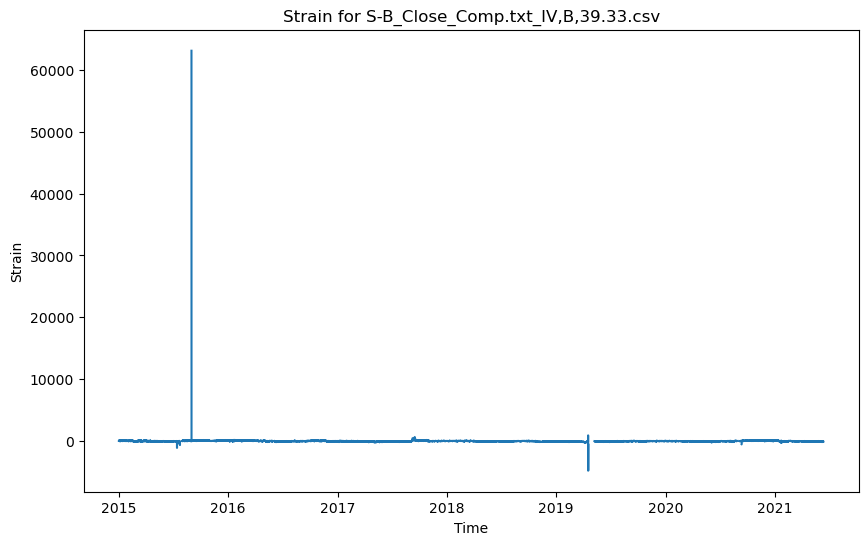

In [57]:
# Add the root project directory to the Python path
project_root = Path.cwd().parent  # This will get the project root since the notebook is in 'notebooks/'
sys.path.append(str(project_root))

from configs.path_config import EXTRACTED_DATA_DIR

base_dir = EXTRACTED_DATA_DIR
file = 'S-B_Close_Comp.txt_IV,B,39.33.csv'
path = Path(base_dir) / 'group_alvbrodel' / file

print(path)

df = pd.read_csv(path, parse_dates=['Time'])

df = df.iloc[12216:-1]

df_original = df.copy()

plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Strain'], linestyle='-')
plt.xlabel('Time')
plt.ylabel('Strain')
plt.title(f'Strain for {file}')
plt.show()

In [58]:
# from src.processing import preprocessing 

# df_original = preprocessing.preprocessing_pipeline(df_original)

In [59]:
from src.processing import remove_outliers

df = remove_outliers.clean_zeros_outliers(df)

df_preshift = df.copy()

print(df)

           Time_index                Time  Strain  Temperature
12216  20150101000000 2015-01-01 00:00:00    32.0         -8.0
12217  20150101040000 2015-01-01 04:00:00    76.0         -7.7
12218  20150101080000 2015-01-01 08:00:00    77.0         -6.7
12219  20150101120000 2015-01-01 12:00:00    66.0         -5.9
12220  20150101160000 2015-01-01 16:00:00     8.0         -5.9
...               ...                 ...     ...          ...
26333  20210610200000 2021-06-10 20:00:00   -63.0         20.0
26334  20210611000000 2021-06-11 00:00:00   -69.0         19.9
26335  20210611040000 2021-06-11 04:00:00   -84.0         19.7
26336  20210611080000 2021-06-11 08:00:00   -73.0         19.0
26337  20210611120000 2021-06-11 12:00:00   -97.0         19.6

[14122 rows x 4 columns]


In [65]:
#indentify the regions of missing values
from src.processing import nan_regions #nan_regions.py

threshold = 0 # Choose the threshold(s) for consecutive NaNs
consecutive_nan_regions, nan_regions_sorted = nan_regions.find_nan_regions(df, threshold)

# for threshold in thresholds:

fig = go.Figure()

# Add strain data line
fig.add_trace(go.Scatter(x=df['Time'], y=df['Strain'], mode='lines', name='Strain Data'))

# Shade regions with more than x consecutive NaNs
for start, end in consecutive_nan_regions:
    fig.add_vrect(
        x0=df['Time'].loc[start], x1=df['Time'].loc[end],
        fillcolor='red', opacity=0.3, layer='below', line_width=0
    )

# Print NaN regions information
# for column in nan_regions_sorted:
    # print(f"Length: {column[4]}, Start Time: {column[2]}, End Time: {column[3]}")

nan_regions_sorted

# Figure layout
fig.update_layout(
    title=f'Regions of more than {threshold} consecutive NaNs',
    xaxis_title='Time',
    yaxis_title='Strain',
    legend=dict(x=0, y=1),
)

fig.show()


In [61]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from src.processing import shift_region

# # Define parameter ranges
# n_points_range = range(10, 26, 4)  # [5, 10, 15]
# std_multiplier_range = np.linspace(1.0, 2.5, 3)  # [3.0, 3.5, 4.0, 4.5, 5.0]
# min_region_size = 5

# # Loop through parameter grid
# for n_points in n_points_range:
#     for std_multiplier in std_multiplier_range:
#         df_shifted = shift_region.shift_scale_diff(df.copy(), std_multiplier, n_points, n_points, min_region_size)

#         # Create a new figure for each combination
#         plt.figure(figsize=(8, 5))

#         # Plot both series
#         plt.plot(df_preshift.index, df_preshift['Strain'], label="Pre-shift", color="blue", alpha=0.7)
#         plt.plot(df_shifted.index, df_shifted['Strain'], label="Shifted", color="red", alpha=0.7)

#         # Title indicating the grid search parameters
#         plt.title(f"n_points={n_points}, std_multiplier={std_multiplier:.1f}", fontsize=12)

#         # Labels and legend
#         plt.xlabel("Time")
#         plt.ylabel("Strain")
#         plt.legend()
#         plt.grid(True, linestyle="--", alpha=0.5)

#         # Show the plot
#         plt.show()


In [62]:
from src.processing import interpolate_nan
from src.processing import nan_regions

interpolate_threshold = 5

consecutive_nan_regions, nan_regions_sorted = nan_regions.find_nan_regions(df, threshold=1)

df_filled = interpolate_nan.interpolate(df, nan_regions_sorted, interpolate_threshold)

In [63]:
fig = go.Figure()

# Add traces for the different data series
fig.add_trace(go.Scatter(x=df_preshift['Time'], y=df_preshift['Strain'], mode='lines', name='Preshift data', line=dict(color='green')))
fig.add_trace(go.Scatter(x=df_filled['Time'], y=df_filled['Strain'], mode='lines', name='Preproccesing notebook', line=dict(color='blue')))
# fig.add_trace(go.Scatter(x=df_original['Time'], y=df_original['Strain'], mode='lines', name='Preproccesing function', line=dict(color='red', dash='dash')))

# Add labels
fig.update_layout(
    title=f'Strain for {file}',
    xaxis_title='Time',
    yaxis_title='Strain',
    template='plotly_white'
)


# Show the plot
fig.show()

In [64]:
"""
Code that saves the data in a csv file where they replace the df['Strain'] with df_filled['Strain'] values

save in a new folder called 'Shifted data' and keep the same name as the original file. 

"""



"\nCode that saves the data in a csv file where they replace the df['Strain'] with df_filled['Strain'] values\n\nsave in a new folder called 'Shifted data' and keep the same name as the original file. \n\n"